# Лабораторная работа 9. Нейронные сети.

In [1]:
import networkx as nx
import pylab
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib notebook

# 1. Линейная регрессия 

Линейная регрессия (англ. Linear regression) — используемая в статистике регрессионная модель зависимости одной (объясняемой, зависимой) переменной y от другой или нескольких других переменных (факторов, регрессоров, независимых переменных) x с линейной функцией зависимости. (Т.е. производится интерполяция данных (x, y) с помощью линейной зависимости).


Задача обучения по прецедентам:
Есть $X$ – множество объектов (исходных данных), $Y$ – множество ответов, $f: X → Y$ – неизвестная зависимость (функция).
И известна обучающая выборка $(x^l, y^l)$. Тогда задавшись видом функции $y = f(x)$:


$$ y = k*x+b$$


можно поставить задачу об определении наиболее подходящих значений k и b.
Для её решения удобно воспользоваться следующей записью:


$$
Ap = y^l, \quad
A = \begin{pmatrix}
  x^l_1 & 1 \\
  ... & ... \\
  x^l_n & 1
\end{pmatrix}, \quad
p = (k,b)^T
$$

Это переопределённая СЛАУ, её можно решить только в смысле минимума ошибки: 

$$|Ap - y^l|^2 → min.$$

Такой подход называется «метод наименьших квадратов».

y = 1.08700e+00 * x + -1.13650e+00


<ipython-input-30-02cfd0f45e45>:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  k, b = np.linalg.lstsq(A, y)[0]   # https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html


<IPython.core.display.Javascript object>


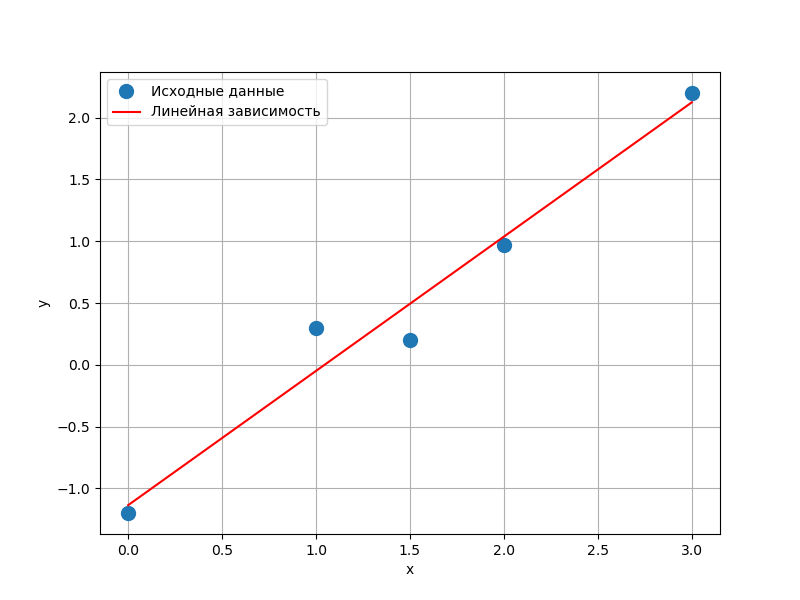

In [30]:
x = np.array([0, 1, 1.5, 2, 3])
y = np.array([-1.2, 0.3, 0.2, 0.97, 2.2])

A = np.vstack([x, np.ones(len(x))]).T

k, b = np.linalg.lstsq(A, y)[0]   # https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html

print('y = %10.5e * x + %10.5e' %(k,b))

pylab.figure (figsize=(8,6))
plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, k*x + b, 'r', label='Линейная зависимость')
plt.xlabel('x'); plt.ylabel('y')
plt.legend(); plt.grid(True); plt.show()

# Упражнение 1.

Задачу минимизации ошибки по обучающей выборке можно представить в следующем виде:

$$ e(p) = |Ap - y^l|^2 → min.$$

Это функция ошибки $e$ от параметра $p$. И для неё можно написать необходимое условие экстремума:

$$ 
e(p) = |Ap - y^l|^2 = (A^T Ap, p) - 2(A^Ty^l,p) + (y^l,y^l), \\
e'(p) = 2(A^T Ap - A^Ty^l) = 0, \\
p = (A^TA)^{-1}A^Ty^l
$$

Этот подход называется методом Гаусса – Ньютона.

Напишите подпрограмму реализующую этот метод.

(Для матричных вычислений используйте библиотеку numpy: https://docs.scipy.org/doc/numpy/reference/routines.linalg.html)

In [3]:
A_p = np.dot(np.linalg.inv(np.dot(A.T, A)), A.T)
p = np.dot(A_p, y)
print(p)
print(k, b)

[ 1.087  -1.1365]
1.0870000000000002 -1.1364999999999996


# 2. Обучения отдельного нейрона

Персептрон Розенблатта. В 1957 году Розенблатт предложил эвристический алгоритм обучения нейрона, основанный на принципах, подсмотренных" в нейрофизиологии. Экспериментально было обнаружено, что при синхронном возбуждении двух связанных нервных клеток синаптическая связь между ними усиливается. Чем чаще синапс угадывает правильный ответ, тем сильнее становится связь. Своеобразная тренировка связи приводит к постепенному запоминанию информации. Если же синапс начинает часто ошибаться или вообще перестаёт использоваться, связь ослабевает, информация начинается забываться. Таким образом, память реализуется в синапсах. В математической модели нейрона роль памяти играет вектор синаптических весов w.

Заметим, что увеличивать имеет смысл только те веса $w_j$, которые соответствуют ненулевым компонентам $x^j_i$, например, можно положить $w := w + ηx_i$, где $η$ - некоторая положительная константа, называемая темпом обучения (learning rate).

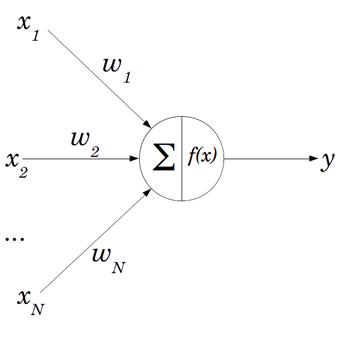

In [28]:
# Так можно добавлять картинки

from IPython.display import Image    # вызов из библиотеки определённой функции
Image("Персептрон.png")              # вызов функции и передача ей в качестве аргумента пути к файлу 

# (в данном случае фаил находится в той же папке)

In [34]:
# метод для вычисления значения персептрона
def calc(w, x):
    res =  0
    for i in range(len(w)):
        res = res + w[i] * x[i]
    return res

# пороговая функция активации персептрона
def sign(w, x):
    if calc(w,x) > 0:
        return 1
    else:
        return -1

# обучение на одном примере
def learn(w, la, x, y):
    error = y - sign(w,x)
    if error != 0:                            # обучаем только, когда результат неверный
        for i in range(len(w)):
            w[i] = w[i] + la * error * x[i]
    return error
            
# обучение по всем данным data - кортеж примеров
def learning(w, la, data):
    for n in range(10000):
        error = 0
        for t in data:
            error += abs(learn(w, la, t[0], t[1]))
        if error == 0: break
        elif n==9999: print('превышено число итераций!')

# функция для вычисления координат линии разделения множеств
def perseptron_line(x1,w):
    x2 = -(x1*w[1]+w[0])/w[2]
    return x2

# вычисление значения персептрона
def perseptron(x,w):
    return sign(w, [1]+list(x))

Создадим данные для обучения:

In [35]:
data = list()
data.append([[1.,2.,1.], 1])
data.append([[1.,3.,2.], 1])
data.append([[1.,4.,1.], 1])
data.append([[1.,1.,2.], -1])
data.append([[1.,2.,3.], -1])
data.append([[1.,5.,7.], -1])
data

[[[1.0, 2.0, 1.0], 1],
 [[1.0, 3.0, 2.0], 1],
 [[1.0, 4.0, 1.0], 1],
 [[1.0, 1.0, 2.0], -1],
 [[1.0, 2.0, 3.0], -1],
 [[1.0, 5.0, 7.0], -1]]

Зададим константу обучения:

In [36]:
la =  0.3

Сгенерируем начальное приближение для весов:

In [37]:
w = np.random.random_sample(3)
w

array([0.30233257, 0.14675589, 0.09233859])

Проведём обучение персептрона:

In [38]:
learning(w, la, data) # обучение персептрона
print(w) # печатаем веса

[ 0.30233257  1.34675589 -1.10766141]


Визуализируем полученное решение:

In [39]:
blue_dataX1 = []
blue_dataX2 = []

red_dataX1 = []
red_dataX2 = []

for i in range(len(data)):
    if data[i][1] > 0:
        blue_dataX1.append(data[i][0][1])                
        blue_dataX2.append(data[i][0][2])
    else:
        red_dataX1.append(data[i][0][1])                
        red_dataX2.append(data[i][0][2])

In [40]:
x1 = np.linspace(min(min(blue_dataX1),min(red_dataX1)), max(max(blue_dataX1),max(red_dataX1)), 2)
x2 = perseptron_line(x1,w)

<IPython.core.display.Javascript object>


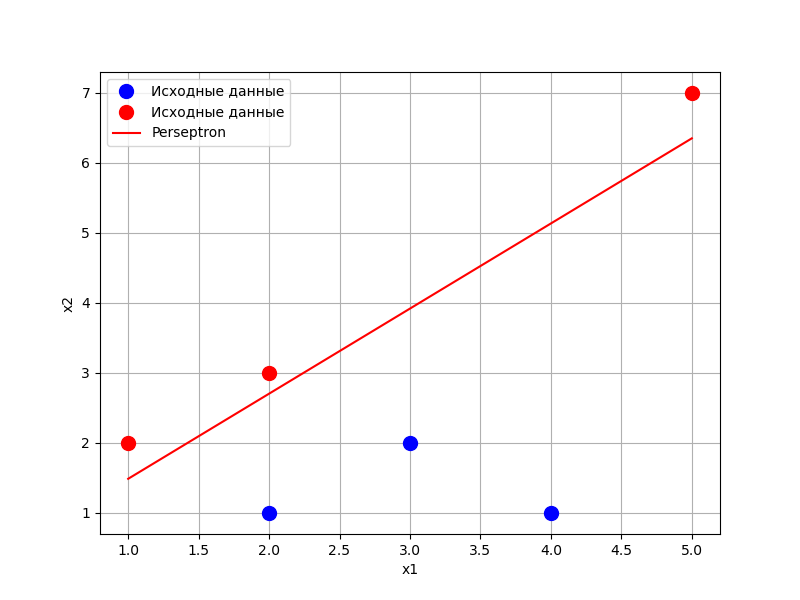

In [41]:
pylab.figure (figsize=(8,6))
plt.plot(blue_dataX1, blue_dataX2, 'o', c='b', label='Исходные данные', markersize=10)
plt.plot(red_dataX1, red_dataX2, 'o', c='r', label='Исходные данные', markersize=10)
plt.plot(x1, x2, 'r', label='Perseptron')
plt.xlabel('x1'); plt.ylabel('x2')
plt.legend(); plt.grid(True); plt.show()

In [43]:
def print_data(data, w):
    
    blue_dataX1 = []
    blue_dataX2 = []

    red_dataX1 = []
    red_dataX2 = []

    for i in range(len(data)):
        if data[i][1] > 0:
            blue_dataX1.append(data[i][0][1])                
            blue_dataX2.append(data[i][0][2])
        else:
            red_dataX1.append(data[i][0][1])                
            red_dataX2.append(data[i][0][2])
    
    x1 = np.linspace(min(min(blue_dataX1),min(red_dataX1)), max(max(blue_dataX1),max(red_dataX1)), 2)
    x2 = perseptron_line(x1,w)
    
    pylab.figure (figsize=(8,6))
    plt.plot(blue_dataX1, blue_dataX2, 'o', c='b', label='Исходные данные', markersize=10)
    plt.plot(red_dataX1, red_dataX2, 'o', c='r', label='Исходные данные', markersize=10)
    plt.plot(x1, x2, 'r', label='Perseptron')
    plt.xlabel('x1'); plt.ylabel('x2')
    plt.legend(); plt.grid(True); plt.show()

<IPython.core.display.Javascript object>


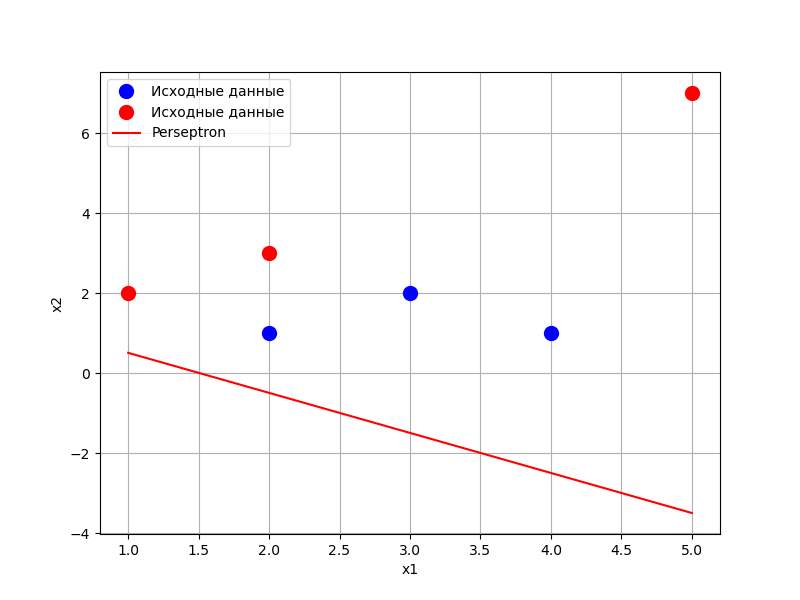

In [44]:
print_data(data, w)

In [14]:
# проверим работу на тестовых примерах
N = 10
test = np.random.uniform(1, 5, (N, 2))
p = np.zeros(N)

pb1 = []
pb2 = []

pr1 = []
pr2 = []

for i in range(N):
    p[i] = perseptron(test[i,0:2],w)
    if p[i]>0:
        pb1.append(test[i,0])                
        pb2.append(test[i,1])
    else:
        pr1.append(test[i,0])                
        pr2.append(test[i,1]) 
        
for i in range(N):
    print(test[i], p[i])

[2.34923015 2.12432634] 1.0
[2.46653612 1.14849974] 1.0
[4.46143069 1.31374203] 1.0
[4.89281485 1.75784627] 1.0
[4.330694   2.42159148] 1.0
[3.43357352 1.93244833] 1.0
[3.69604789 3.62507311] 1.0
[3.72604184 2.3158465 ] 1.0
[3.9292665  3.56691023] 1.0
[3.48685406 3.2709322 ] 1.0


<IPython.core.display.Javascript object>


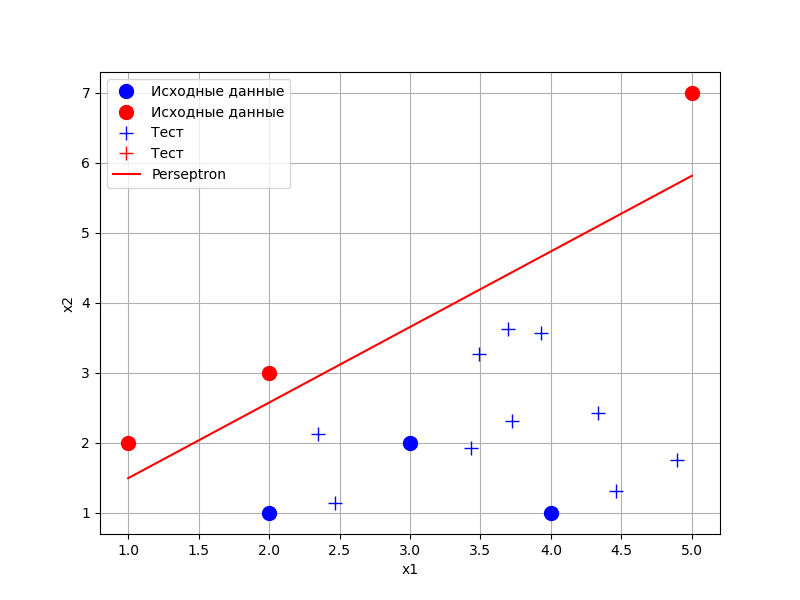

In [15]:
pylab.figure (figsize=(8,6))
plt.plot(blue_dataX1, blue_dataX2, 'o', c='b', label='Исходные данные', markersize=10)
plt.plot(red_dataX1, red_dataX2, 'o', c='r', label='Исходные данные', markersize=10)
plt.plot(pb1, pb2, '+', c='b', label='Тест', markersize=10)
plt.plot(pr1, pr2, '+', c='r', label='Тест', markersize=10)
plt.plot(x1, x2, 'r', label='Perseptron')
plt.xlabel('x1'); plt.ylabel('x2')
plt.legend(); plt.grid(True); plt.show()

In [16]:
def TEST(w, N=10, test = True):
    
    # проверим работу на тестовых примерах
    if test: test = np.random.uniform(1, 5, (N, 2))
    p = np.zeros(N)

    pb1 = []
    pb2 = []

    pr1 = []
    pr2 = []

    for i in range(N):
        p[i] = perseptron(test[i,0:2],w)
        if p[i]>0:
            pb1.append(test[i,0])                
            pb2.append(test[i,1])
        else:
            pr1.append(test[i,0])                
            pr2.append(test[i,1]) 

    for i in range(N):
        print(test[i], p[i])
        
    pylab.figure (figsize=(8,6))
    plt.plot(blue_dataX1, blue_dataX2, 'o', c='b', label='Исходные данные', markersize=10)
    plt.plot(red_dataX1, red_dataX2, 'o', c='r', label='Исходные данные', markersize=10)
    plt.plot(pb1, pb2, '+', c='b', label='Тест', markersize=10)
    plt.plot(pr1, pr2, '+', c='r', label='Тест', markersize=10)
    plt.plot(x1, x2, 'r', label='Perseptron')
    plt.xlabel('x1'); plt.ylabel('x2')
    plt.legend(); plt.grid(True); plt.show()

[1.20653157 4.98041307] -1.0
[2.07214125 4.90536458] -1.0
[4.69153174 1.51369458] 1.0
[3.63015088 3.1609395 ] 1.0
[1.89661991 1.49860184] 1.0
[1.49781002 4.86396906] -1.0
[2.6296378  4.38077571] -1.0
[2.08925933 1.62820517] 1.0
[1.736909   4.71952867] -1.0
[2.90584669 2.76843351] 1.0
[2.61875797 2.59751417] 1.0


<IPython.core.display.Javascript object>


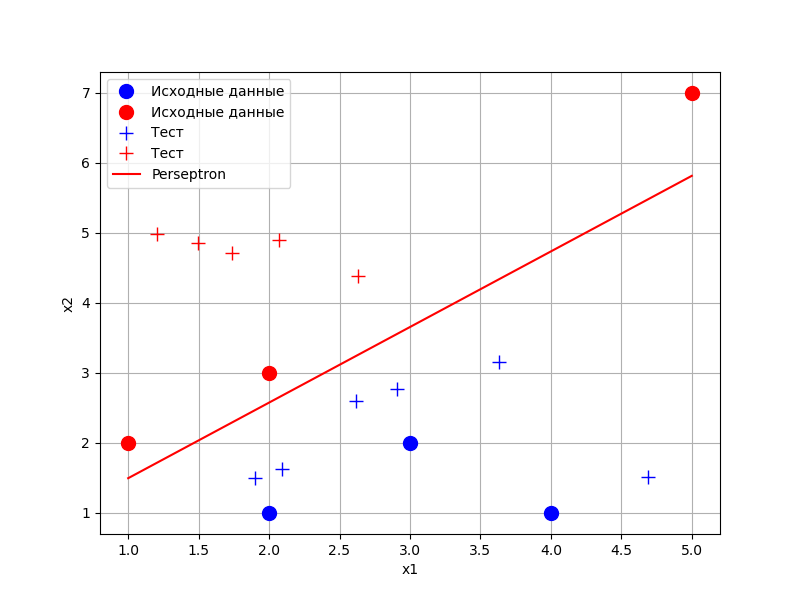

In [17]:
test = np.array([[3.64323462, 1.24003704], [3.45746066, 2.42179317]])

#TEST(w, 2, test)
TEST(w, 11)

# Упражнение 2.

Попробуёте использовать Персептрон для решения задач логических AND, OR и XOR. Визуализируйте полученный результат.

AND: 
data = [[[1, 0, 0], 0],
        [[1, 0, 1], 0],
        [[1, 1, 0], 0],
        [[1, 1, 1], 1]];
 
и т.д.

[0.25531788 0.47789901 0.48190621]
[-0.14468212  0.47789901  0.48190621]


<IPython.core.display.Javascript object>


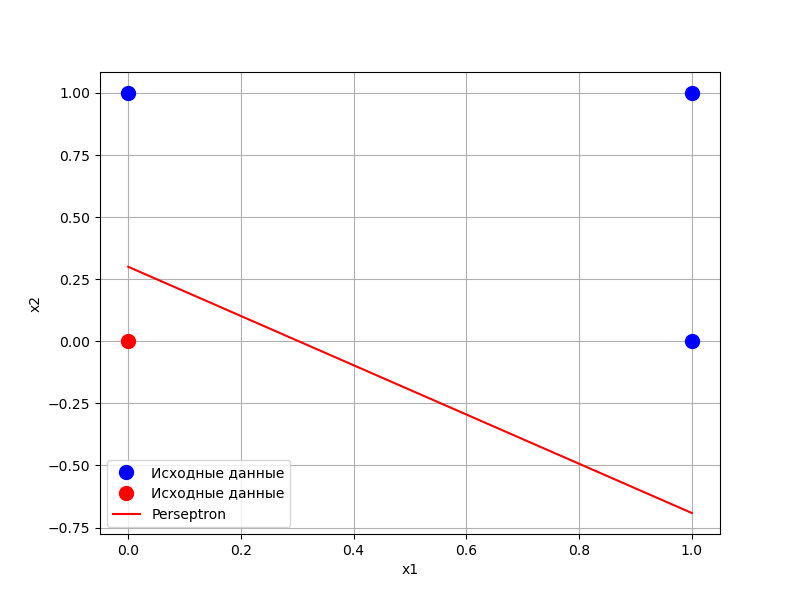

In [29]:
dataAND = [[[1, 0, 0], -1], [[1, 0, 1], -1], [[1, 1, 0], -1], [[1, 1, 1], 1]]
dataOR  = [[[1, 0, 0], -1], [[1, 0, 1], 1], [[1, 1, 0], 1], [[1, 1, 1], 1]]
dataXOR = [[[1, 0, 0], -1], [[1, 0, 1], 1], [[1, 1, 0], 1], [[1, 1, 1], -1]]

w = np.random.random_sample(3)
print(w) # печатаем веса

learning(w, la, dataOR) # обучение персептрона
print(w) # печатаем веса

print_data(dataOR, w)

# 3. Многослойные нейронные сети.

Рассмотрим композицию нейронов. Значения всех n признаков одновременно подаются на вход всех H нейронов первого слоя. Затем их выходные значения подаются на вход всех M нейронов следующего слоя. В данном случае этот слой является выходным такая сеть называется двухслойной. В общем случае сеть может содержать произвольное число слоёв. Все слои, за исключением последнего, называются скрытыми (hidden layers).

Многослойные сети также можно настраивать градиентными методами, несмотря на огромное количество весовых коэффициентов. Известен весьма эффетивный способ вычисления градиента, при котором каждый градиентный шаг выпол няется за число операций, лишь немногим большее, чем при обычном вычислении сети на одном объекте.

На первый взгляд, количество операций, необходимых для вычисления градиента, должно было бы возрасти пропорционально числу весовых коэффициентов. Однако этого удаётся избежать путём аналитического дифференцирования суперпозиции с сохранением всех необходимых промежуточных величин. Данный метод получил название обратного распространения ошибок (error back-propagation).


# Метод обратного распространения ошибок

Рассмотрим многослойную сеть, в который каждый нейрон предыдущего слоя связан со всеми нейронами последующего слоя. Для большей общности положим $X = R^n, Y = R^m$.

Введём следующие обозначения. Пусть выходной слой состоит из M нейронов с функциями активации $f_m$ и выходами $y^m, m = 1,...,M$. Перед ним находится скрытый слой из H нейронов с функциями активации $f_h$ и выходами $u^h, h = 1,...,H$.
Веса синаптических связей между $h-м$ нейроном скрытого слоя и m-м нейроном выходного слоя будем обозначать через $w_{hm}$. Перед этим слоем может находиться либо распределительный слой, либо ещё один скрытый слой с выходами $v^j , j = 1,..., J$
и синаптическими весами $w_{jh}$. В общем случае число слоёв может быть произвольным. 

На рисунке ниже приведён пример с двумя внутренними слоями, в котором в первом слое 3 нейрона (1,2,3), во втором 2 нейрона (4,5), а в выходном один (6). Рисунок показывает процесс вычислений в рамках метода обратного распространения ошибок.

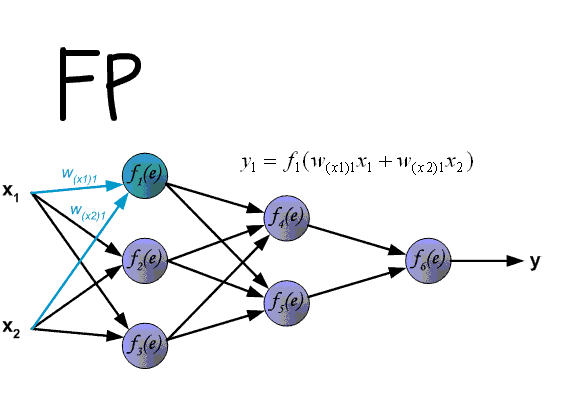

In [37]:
# Так можно добавлять картинки

from IPython.display import Image    # вызов из библиотеки определённой функции
Image("МОРО.gif")                    # вызов функции и передача ей в качестве аргумента пути к файлу 

# (в данном случае фаил находится в той же папке)

Алгоритм обучения двухслойной сети методом обратного распространения ошибки:
(Вход: $(x^l,y^l)$ - обучающее множество данных, H - число нейронов в скрытом слое, la - темп обучения; Выход: синаптические веса $w_{jh}, w_{hm}$)


1. Инициализировать веса небольшими случайными значениями: 
$$ w_{jh} = random(−1/2n, 1/2n);
w_{hm} = random(-1/2H, 1/2H); $$
2. Выбрать $x_i$;
3. Прямой ход - вычислить: 
$$u^{h}(x_{i}) = f(x_{i}, w_{jh}), \quad u^{\prime h}(x_{i}) = f(x_{i}, w_{jh})(1-f(x_{i}, w_{jh}))$$
$$ y^m(x_i) = f(u^h(x_i), w_{hm}), \quad y^{^\prime m}(x_i) = f(u^h(x_i), w_{hm})(1-f(u^h(x_i), w_{hm})) $$
$$ e^m = y^m(x_i) - y^m_i, \quad Q_i = \sqrt{e^m*e^m} $$
4. Обратный ход - вычислить:
$$ e^h = e^m y^{^\prime m}(x_i) w_{hm} $$
5. Градиентный шаг:
$$ w_{hm} = w_{hm} - la e^m y^{^\prime m}(x_i) u^h(x_i) $$
$$ w_{jh} = w_{jh} - la e^h u^{^\prime h}(x_i) x_i $$
(Повторять пункты 2 - 5 пока sum(Q_i) > error.)

# Упражнение 3. 

Напишите программы для обучения и использования двухслойной нейронной сети.

Используйте при этом следующую функцию активации и её производную:

In [4]:
# активационная функция (1/(e^(-x)))
from scipy.special import expit
def f(x):
    return expit(x)

# производная активационной функции
def f1(x):
    return x * (1 - x)

In [89]:
import random

def BackPropagation(x, y, n, H, la):
    w_jh = random.uniform(-0.5 * n, 0.5 * n)
    w_hm = random.uniform(-0.5 * H, 0.5 * H)
    #while sum(Q_i) > error:
    
    u_h = f(np.dot(x, w_jh))
    u_h_ = f1(f(np.dot(x, w_jh)))
    y_m = f(np.dot(u_h, w_hm))
    y_m_ = f1(f(np.dot(u_h, w_hm)))
    e_m = y_m - y_m_
    Q_i = np.sqrt(np.dot(e_m, e_m)).sum()
    #print(Q_i)
    while Q_i > 0:
        u_h = f(np.dot(x, w_jh))
        u_h_ = f1(f(np.dot(x, w_jh)))
        y_m = f(np.dot(u_h, w_hm))
        y_m_ = f1(f(np.dot(u_h, w_hm)))
        e_m = y_m - y_m_
        Q_i = np.sqrt(np.dot(e_m, e_m))
        e_h = e_m * y_m_ * w_hm
        w_hm = w_hm - la * e_m * y_m_ * u_h
        w_jh = w_jh - la * e_h * u_h_ * x
        return w_jh, w_hm
 
    
x = np.array([0, 1, 1.5, 2, 3])
y = np.array([-1.2, 0.3, 0.2, 0.97, 2.2])
BackPropagation(x, y, 10, 100, 0.03)

(array([-4.65674429, -4.65627275, -4.65663197, -4.6567291 , -4.65674407]),
 array([-45.10589445, -45.10590501, -45.10589611, -45.10589462,
        -45.10589445]))

# Упражнение 4.

Попробуёте использовать двуслойную нейронную сеть для решения задач логических AND, OR и XOR. Визуализируйте полученный результат.

AND: 
data = [[[1, 0, 0], 0],
        [[1, 0, 1], 0],
        [[1, 1, 0], 0],
        [[1, 1, 1], 1];
 
и т.д.

Выходные данные после тренировки:
 [[5.47783858e-06]
 [1.63682391e-02]
 [1.63682391e-02]
 [9.80601624e-01]] 

w =  [[-12.11495255]
 [  8.01899116]
 [  8.01899116]] 
la =  0.02152959038596849


<IPython.core.display.Javascript object>


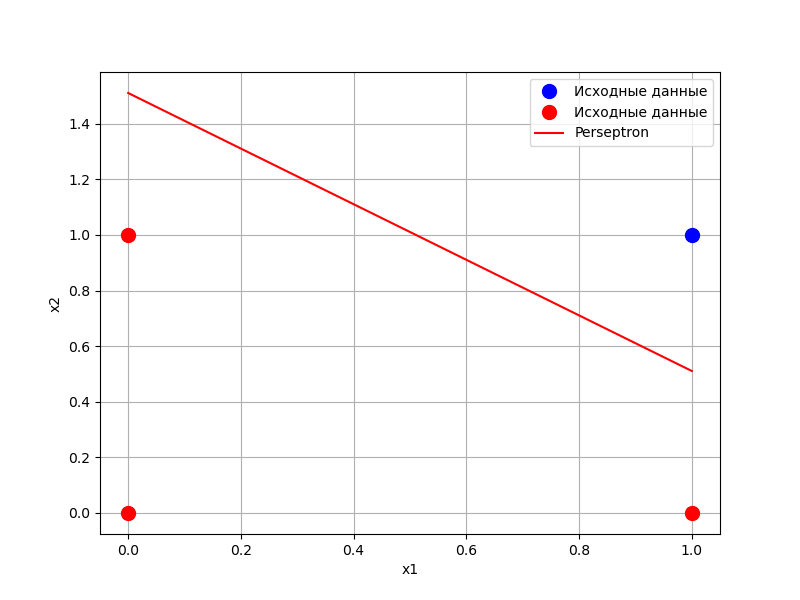

In [66]:
dataAND = np.array([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])
y = np.array([[0, 0, 0, 1]]).T

#dataOR  = [[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]
#y = np.array([[0, 1, 1, 1]]).T

#dataXOR = [[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]
#y = np.array([[0, 1, 1, 1]]).T

np.random.seed(1)   # сделаем случайные числа более определёнными
w = np.random.random((3,1))

for iter in range(10000):
    l0 = dataAND
    l1 = f(np.dot(l0, w))
    l1_error = y - l1
    l1_delta = l1_error * f1(l1)
    w +=  np.dot(l0.T, l1_delta)

print('Выходные данные после тренировки:\n', l1, '\n')

dataAND = [[[1, 0, 0], -1], [[1, 0, 1], -1], [[1, 1, 0], -1], [[1, 1, 1], 1]]
#dataOR  = [[[1, 0, 0], -1], [[1, 0, 1], 1], [[1, 1, 0], 1], [[1, 1, 1], 1]]
#dataXOR = [[[1, 0, 0], -1], [[1, 0, 1], 1], [[1, 1, 0], 1], [[1, 1, 1], -1]]

la = random.uniform(0.0, 0.05)
learning(w, la, dataAND) # обучение персептрона
print('w = ', w , '\nla = ', la) # печатаем веса
print_data(dataAND, w)

# 4. Генерация данных

Для тестирования работоспособности нейронных сетей рассмотри различные пары множеств эллементов.

In [95]:
def plot_model_data(blue_data, red_data):
    plt.figure(figsize=(10, 10))
    plt.scatter(blue_data[:,0], blue_data[:,1], color="blue", alpha=0.3)
    plt.scatter(red_data[:,0], red_data[:,1], color="red", alpha=0.3)
    plt.show()

In [96]:
def generate_linear(point_count, slope, constant):
    points = np.random.rand(point_count, 2)
    above_index = slope * points[:, 0] + constant < points[:, 1]
    blue_data = points[above_index, :]
    red_data = points[~above_index, :]
    return blue_data, red_data

<IPython.core.display.Javascript object>


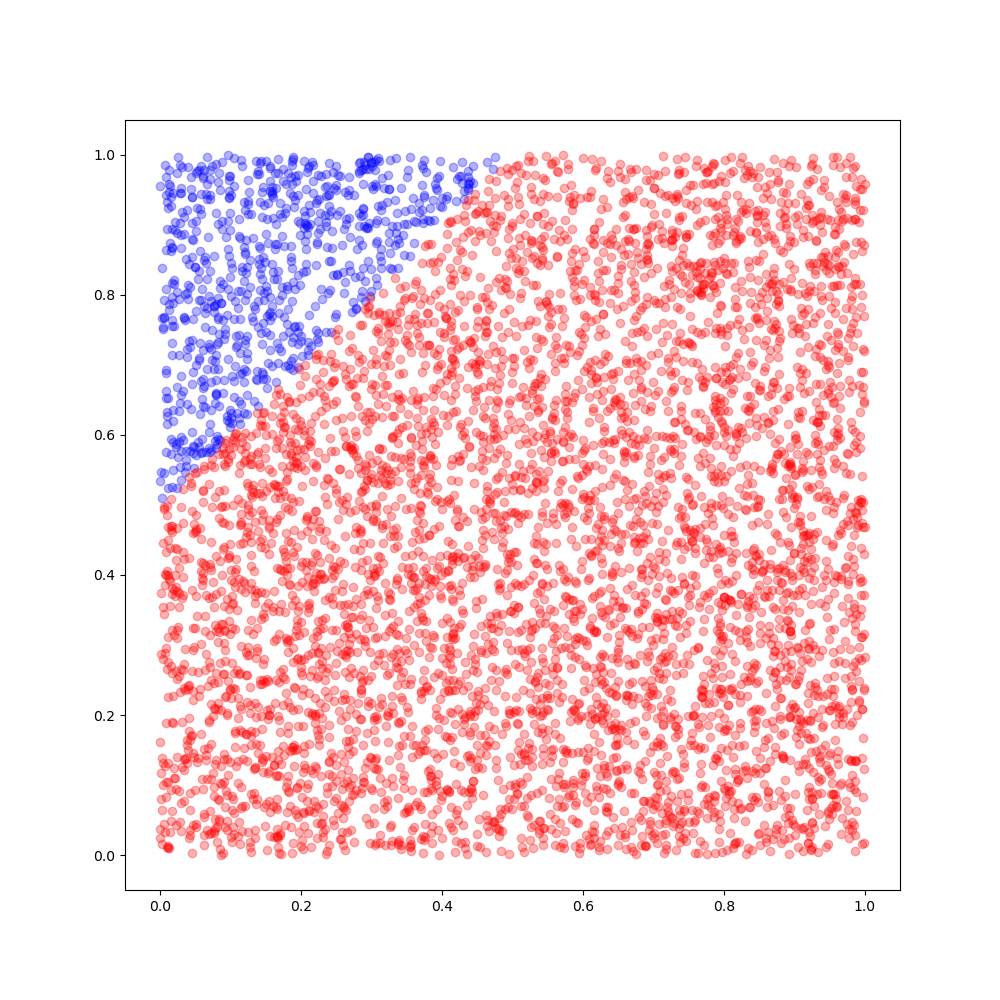

[[0.16292114 0.87221315]
 [0.21102011 0.7716962 ]
 [0.37435452 0.99308351]
 ...
 [0.00335413 0.83820606]
 [0.36085268 0.87361663]
 [0.01996901 0.75486259]] [[0.06051685 0.09455485]
 [0.0955744  0.04886528]
 [0.24162007 0.2971444 ]
 ...
 [0.13416815 0.36047721]
 [0.48976015 0.4032123 ]
 [0.55891605 0.64306389]]


In [97]:
linear1, linerate2 = generate_linear(6000, 1, 0.5)
plot_model_data(linear1, linerate2)
print(linear1, linerate2)

<IPython.core.display.Javascript object>


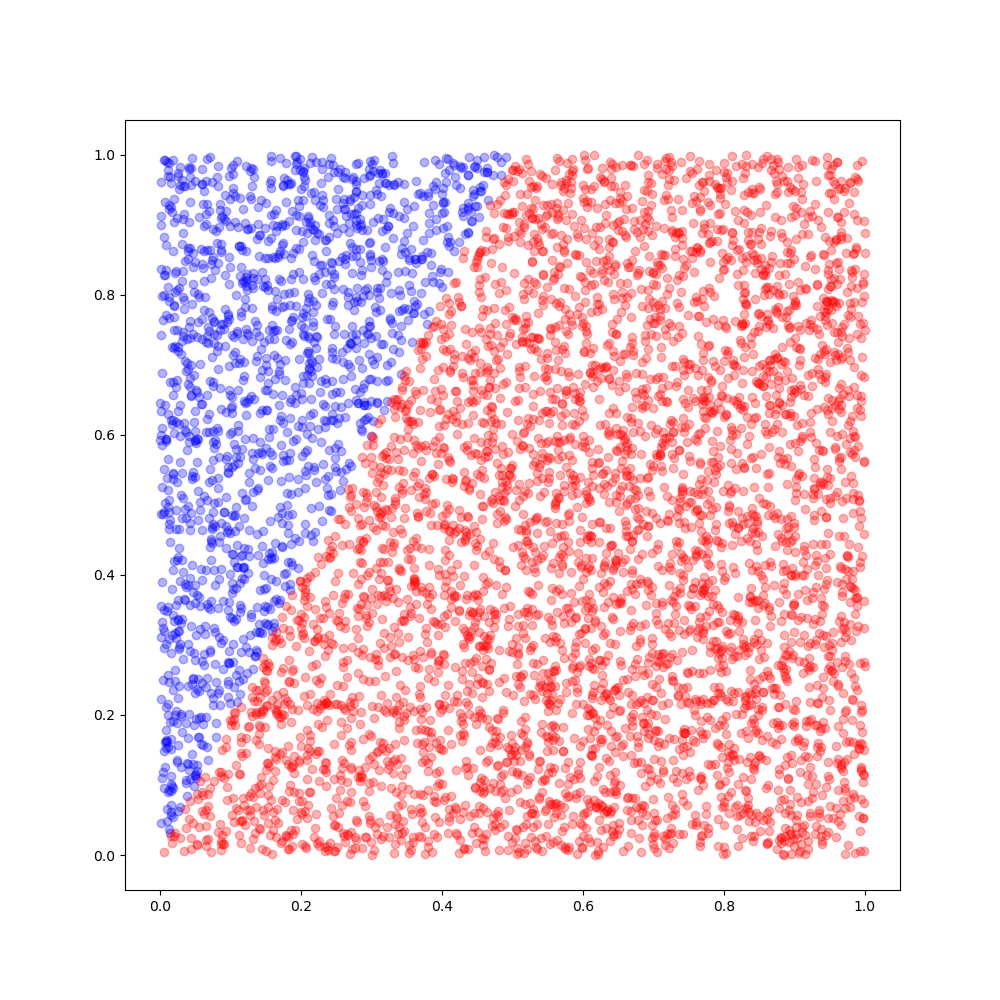

In [98]:
linear1, linerate2 = generate_linear(6000, 2, 0.0)
plot_model_data(linear1, linerate2)

In [99]:
def generate_circle(point_count, center, radius = 0.25):
    points = np.random.rand(point_count, 2)
    x, y = center
    inside_index = (points[:, 0] - x)**2 + (points[:, 1] - y)**2 <= (radius)**2
    blue_data = points[inside_index, :]
    red_data = points[~inside_index, :]
    return blue_data, red_data

<IPython.core.display.Javascript object>


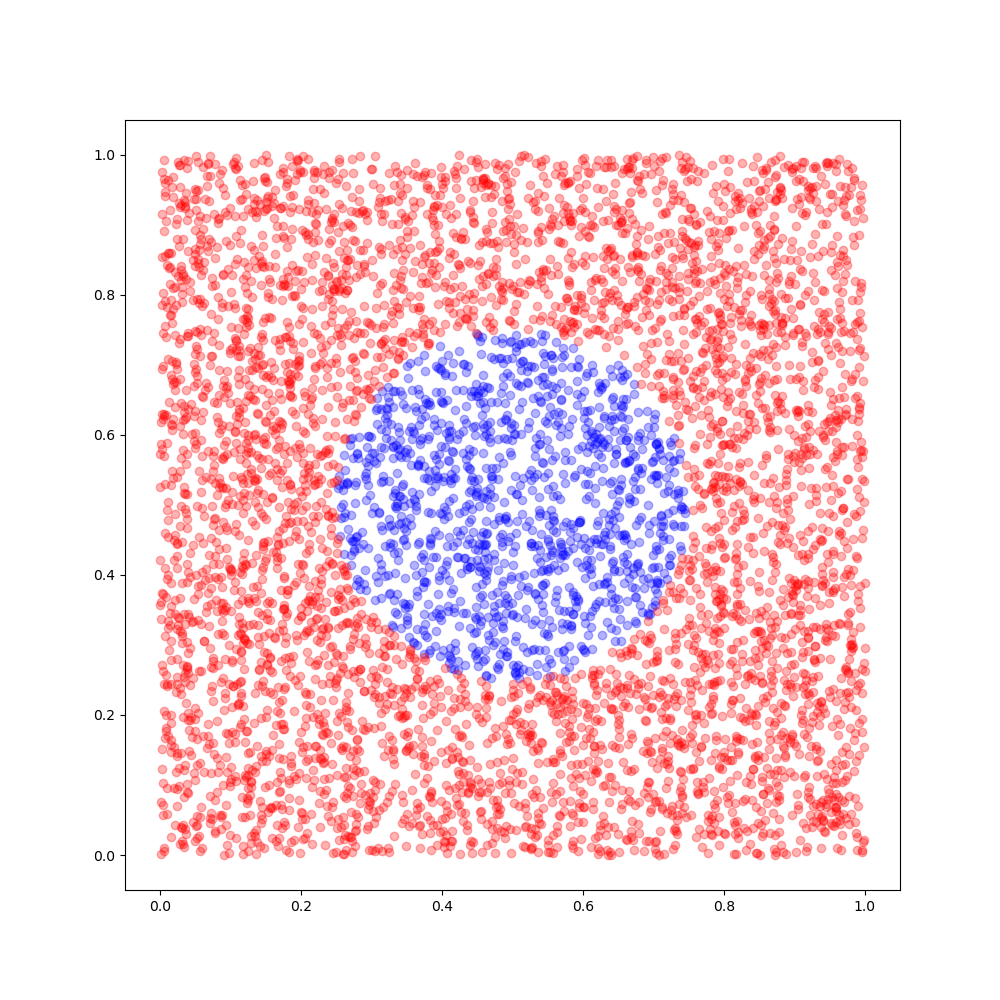

In [100]:
blue_data, red_data = generate_circle(6000, (0.5, 0.5))
plot_model_data(blue_data, red_data)

In [101]:
def generate_saw(point_count, width, height):
    points = np.random.rand(point_count, 2)
    subsaw_index = (points[:, 0] / width).astype(int)
    unit = points[:, 0] - subsaw_index * width
    below_index = points[:, 1] < 0.5 - 2.0 * (subsaw_index % 2 - 0.5) * (unit * 2 * height / width - height)
    blue_data = points[below_index, :]
    red_data = points[~below_index, :]
    return blue_data, red_data

<IPython.core.display.Javascript object>


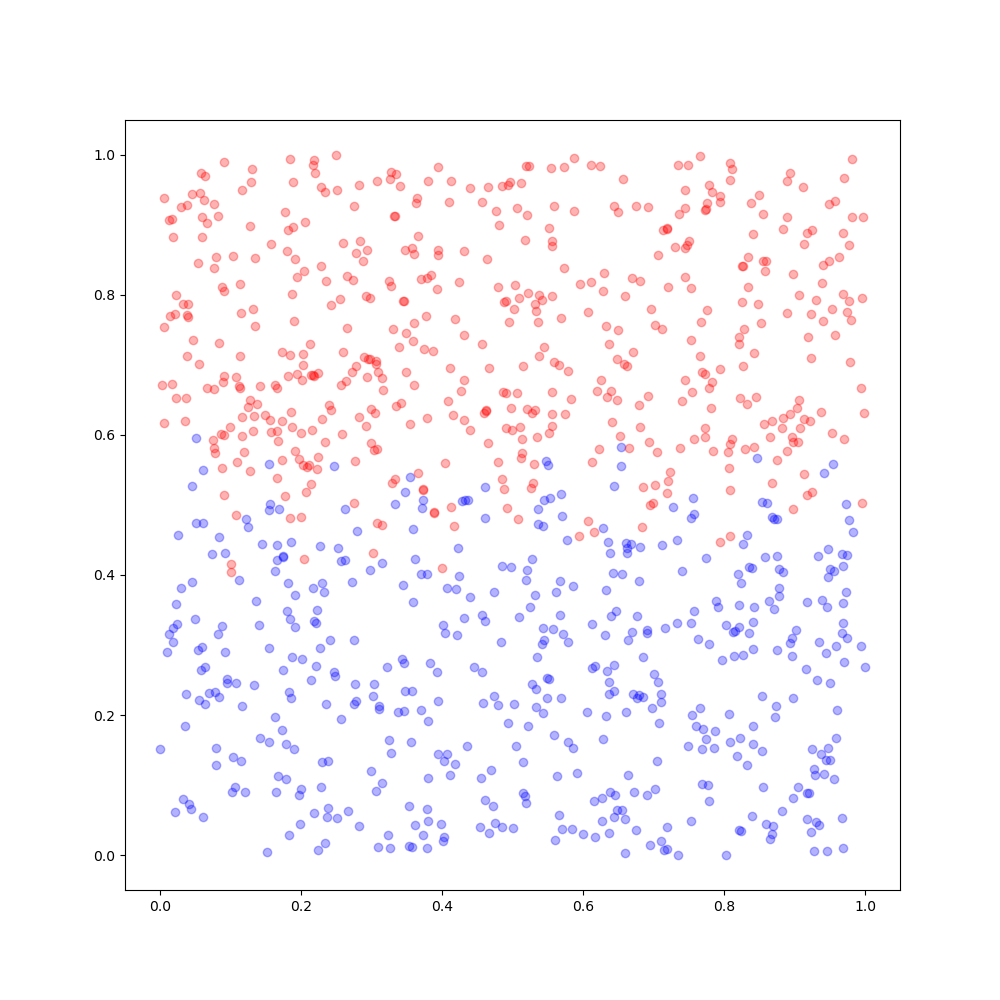

In [102]:
blue_data, red_data = generate_saw(1000, 0.05, 0.1)
plot_model_data(blue_data, red_data)

<IPython.core.display.Javascript object>


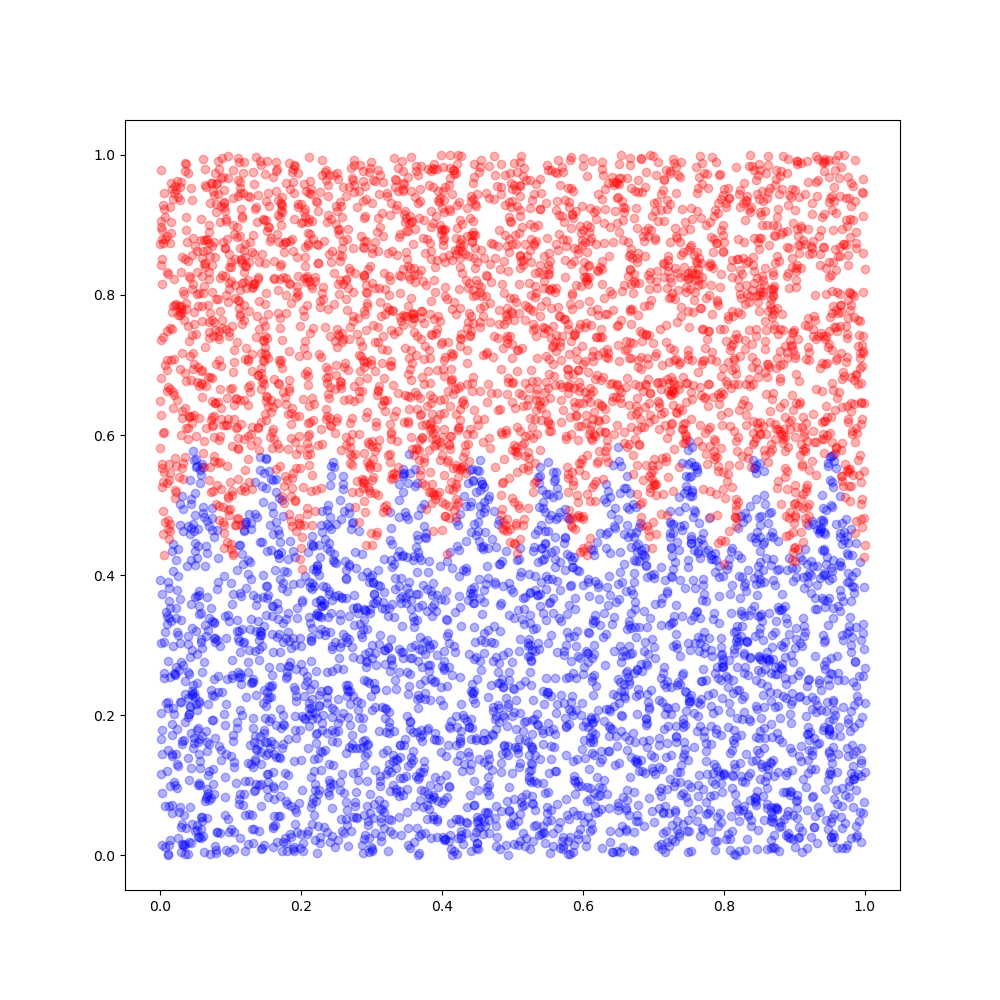

In [103]:
blue_data, red_data = generate_saw(6000, 0.05, 0.1)
plot_model_data(blue_data, red_data)

<IPython.core.display.Javascript object>


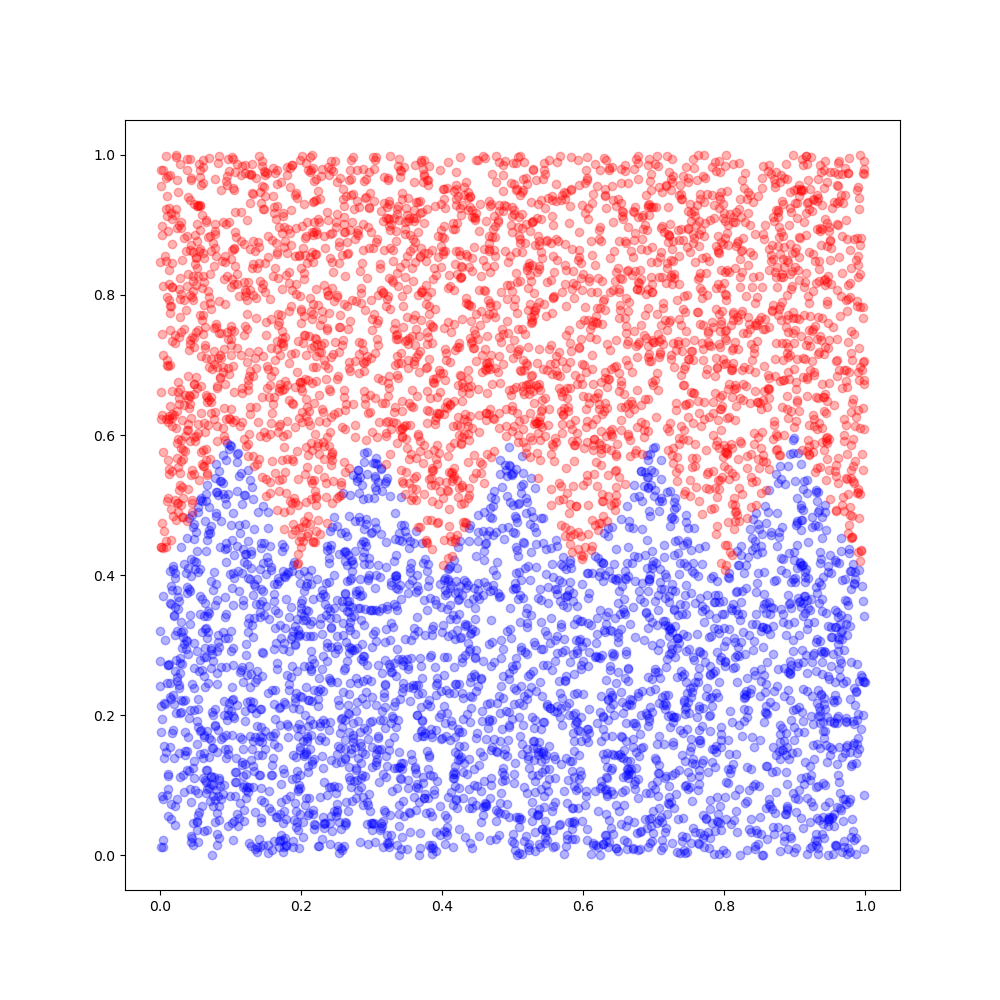

In [104]:
blue_data, red_data = generate_saw(6000, 0.1, 0.1)
plot_model_data(blue_data, red_data)

In [105]:
def generate_gaussian(point_count, mu, transform_matrix):
    """V = transform_matrix
    function: X = mu + V.T x X
    output: Normal(mu, V.T x V)
    """
    points = np.random.randn(point_count, 2)
    points = mu + np.dot(transform_matrix.T, points.T).T
    return points

<IPython.core.display.Javascript object>


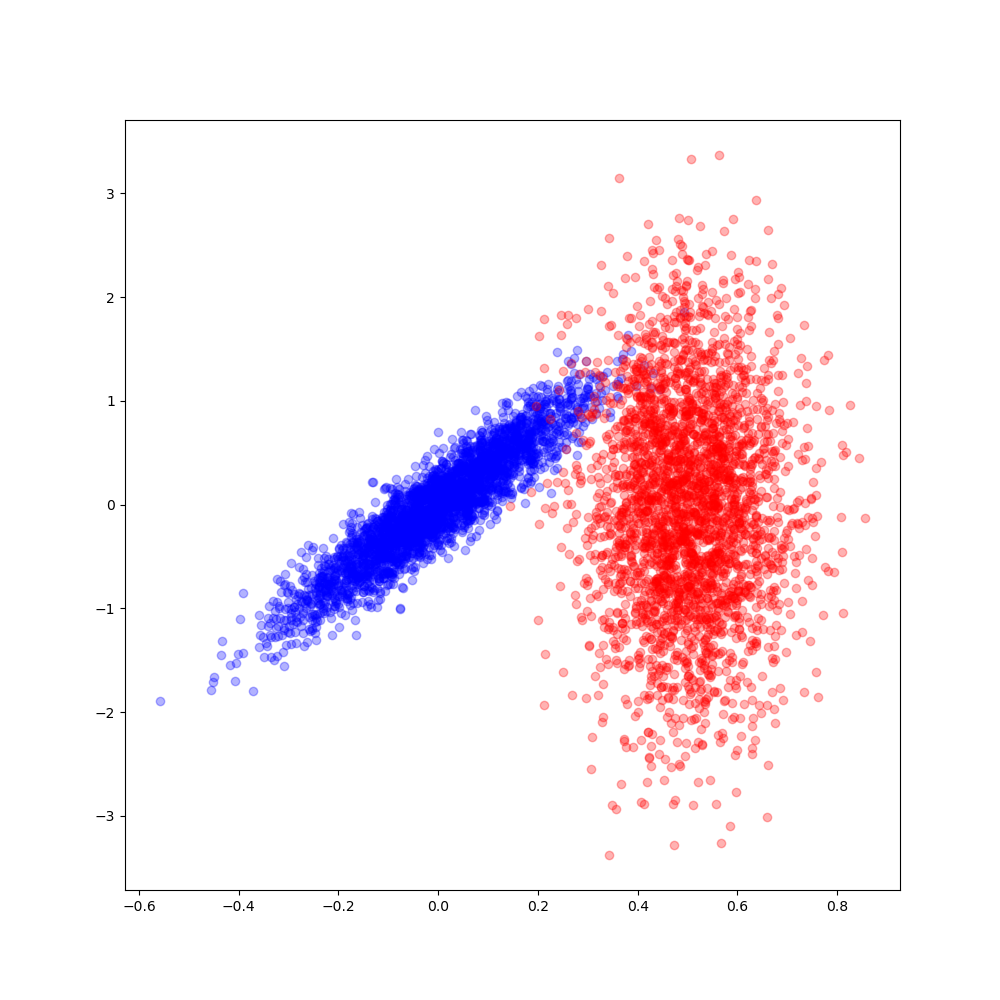

In [106]:
blue_data = generate_gaussian(3000, (0, 0), np.array([[0.1, 0.2], [0.1, 0.5]]))
red_data = generate_gaussian(3000, (0.5, 0), np.array([[0.1, 0], [0, 1.0]]))
plot_model_data(blue_data, red_data)

# Домашнее задание (базовое):

# Задание 1.

Напишите программу эквивалентную упражнению 3, но для произвольного числа слоёв в нейронной сети.

In [140]:
x = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])               
y = np.array([[0],[1],[1],[0]])

def f3(x, y):
    np.random.seed(1)
    # случайно инициализируем веса, в среднем - 0
    syn0 = np.random.random((len(x[0]),len(x)))
    syn1 = np.random.random((len(y),len(y[0])))

    for j in range(60000):

        # проходим вперёд по слоям 0, 1 и 2
        l0 = x
        l1 = f(np.dot(l0,syn0))
        l2 = f(np.dot(l1,syn1))

        # как сильно мы ошиблись относительно нужной величины?
        l2_error = y - l2

        if (j% 10000) == 0:
            print('Error:' + str(np.mean(np.abs(l2_error))))

        # в какую сторону нужно двигаться?
        # если мы были уверены в предсказании, то сильно менять его не надо
        l2_delta = l2_error*f1(l2)

        # как сильно значения l1 влияют на ошибки в l2?
        l1_error = l2_delta.dot(syn1.T)

        # в каком направлении нужно двигаться, чтобы прийти к l1?
        # если мы были уверены в предсказании, то сильно менять его не надо
        l1_delta = l1_error * f1(l1)

        syn1 += l1.T.dot(l2_delta)
        syn0 += l0.T.dot(l1_delta)
        
f3(x, y)

Error:0.4991685688467836
Error:0.012641570618524785
Error:0.008275364939113836
Error:0.006480596505892616
Error:0.0054565890323720456
Error:0.004779321034458695


# Задание 2.

Используйте имеющиеся у вас программы для обучения нейронных сетей для примеров рассмотренных пункте 4 множеств данных и протестируйте их.

In [141]:
f3(linear1, linerate2)

ValueError: shapes (1478,1478) and (4522,2) not aligned: 1478 (dim 1) != 4522 (dim 0)

# Задание 3.

Постройте линию разделения множеств для нейронных сетй из предыдущего задания.

# Домашнее задание (дополнительное):

# Задание. Крепкие сети.

Реализуйте алгоритм обучения с подкреплением Q-learning 

(https://ru.wikipedia.org/wiki/Q-%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5). 

Напишите с её помощью искуственный интелект для игры в крестики-нолики.